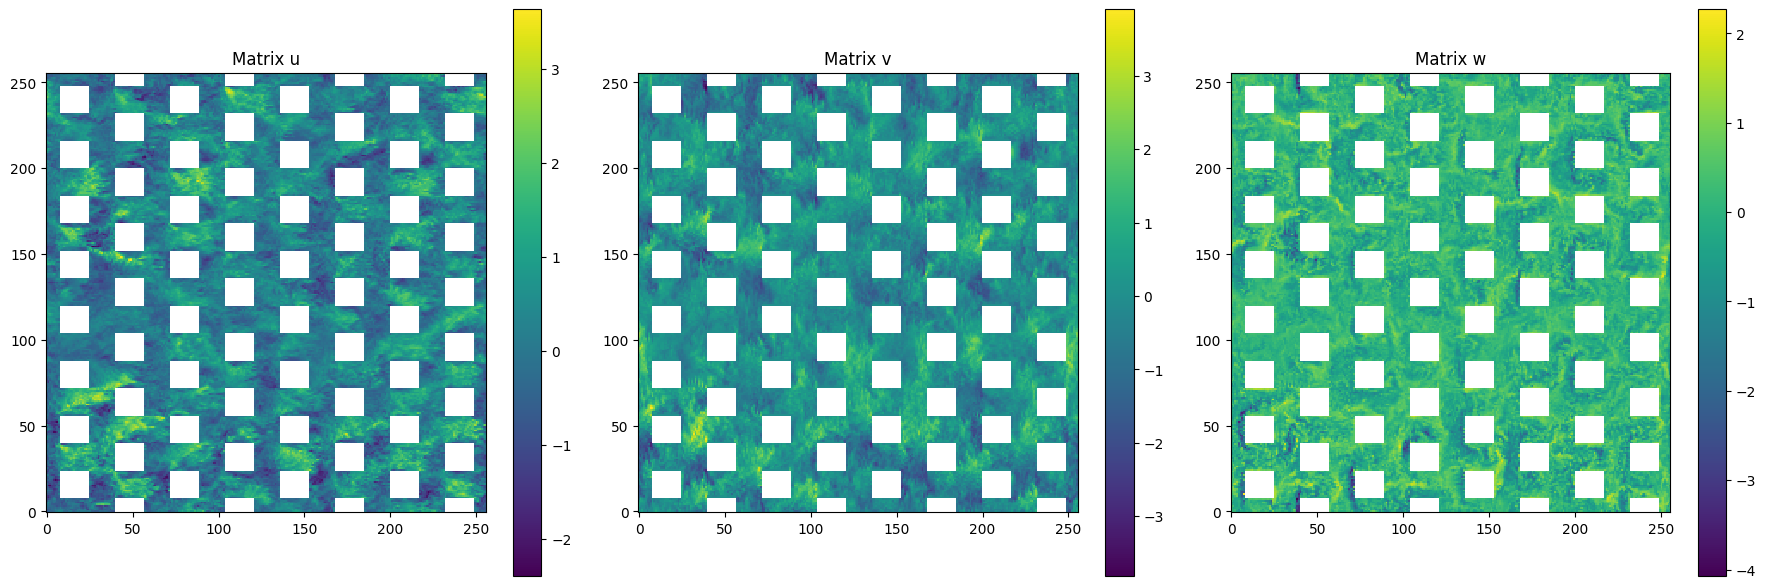

In [3]:
# checking wtf is in the file

import numpy as np
import matplotlib.pyplot as plt

data = np.load(r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_0.npy')
data.shape, data
u = data[0]
v = data[1]
w = data[2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
titles = ['Matrix u', 'Matrix v', 'Matrix w']
for ax, matrix, title in zip(axes, [u, v, w], titles):
    cax = ax.matshow(matrix, cmap='viridis',origin='lower')
    ax.xaxis.set_ticks_position('bottom')
    fig.colorbar(cax, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [19]:
# testing function (plus-shape sub-domain)

def block_picking_plus_test(path_1, path_2, path_3):
    """
    加号法 (plus-shape method)
    grid_1 at t^N
    grid_2 at t^(N+1)
    grid_3 is building info matrix
    (x,y) is picked randomly to extract a block
    """
    t_1 = np.load(path_1)
    t_2 = np.load(path_2)
    grid_3 = np.load(path_3)

    width, height = grid_3.shape
    min = 64                                # Minimum offset
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    h_block = grid_3[y:y+64, x:x+64]
    matrix_list = []
    C_block_next_level_list = []

    for i, grid_1 in enumerate(t_1[:3], start=1 ):
        grid_2 = t_2[i-1]
        S_block = grid_2[y+64:y+128, x:x+64]        
        E_block = grid_2[y:y+64, x+64:x+128]
        W_block = grid_2[y:y+64, x-64:x]
        N_block = grid_2[y-64:y, x:x+64]
        C_block = grid_1[y:y+64, x:x+64]

        C_block_next_level = grid_2[y:y+64, x:x+64]

        stack_matrix = np.vstack([N_block, E_block, W_block, S_block, C_block, h_block])
        matrix_list.append(stack_matrix)
        matrix_list.append(C_block_next_level)

    print(x,y)

    return matrix_list

In [2]:
# testing function (nine-grid sub-domain)

def block_picking_nine_test(path_1):
    """
    九宫格方法 (nine_grid method)
    """
    t_1 = np.load(path_1)
    grid_3 = t_1[0]

    width, height = grid_3.shape
    min = 64 
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    matrix_list = []

    for i, grid_1 in enumerate(t_1[:3], start=1):
        grid_2 = t_1[i-1]
        # Ensuring positive slices
        block_1_1 = grid_2[y-64:y, x-64:x]
        block_1_2 = grid_2[y-64:y, x:x+64]
        block_1_3 = grid_2[y-64:y, x+64:x+128]  
 
        block_2_1 = grid_2[y:y+64, x-64:x]
        block_2_2 = grid_1[y:y+64, x:x+64]
        block_2_3 = grid_2[y:y+64, x+64:x+128]
        
        block_3_1 = grid_2[y+64:y+128, x-64:x]
        block_3_2 = grid_2[y+64:y+128, x:x+64]
        block_3_3 = grid_2[y+64:y+128, x+64:x+128]

        stack_matrix = np.vstack([block_1_1, block_1_2, block_1_3, block_2_1, block_2_2, block_2_3, block_3_1, block_3_2, block_3_3])
        matrix_list.append(stack_matrix)

    print(x,y)

    return matrix_list

97 108

Accessing stored matrices:
Matrix 1 size: (384, 64)
Matrix 2 size: (384, 64)
Matrix 3 size: (384, 64)


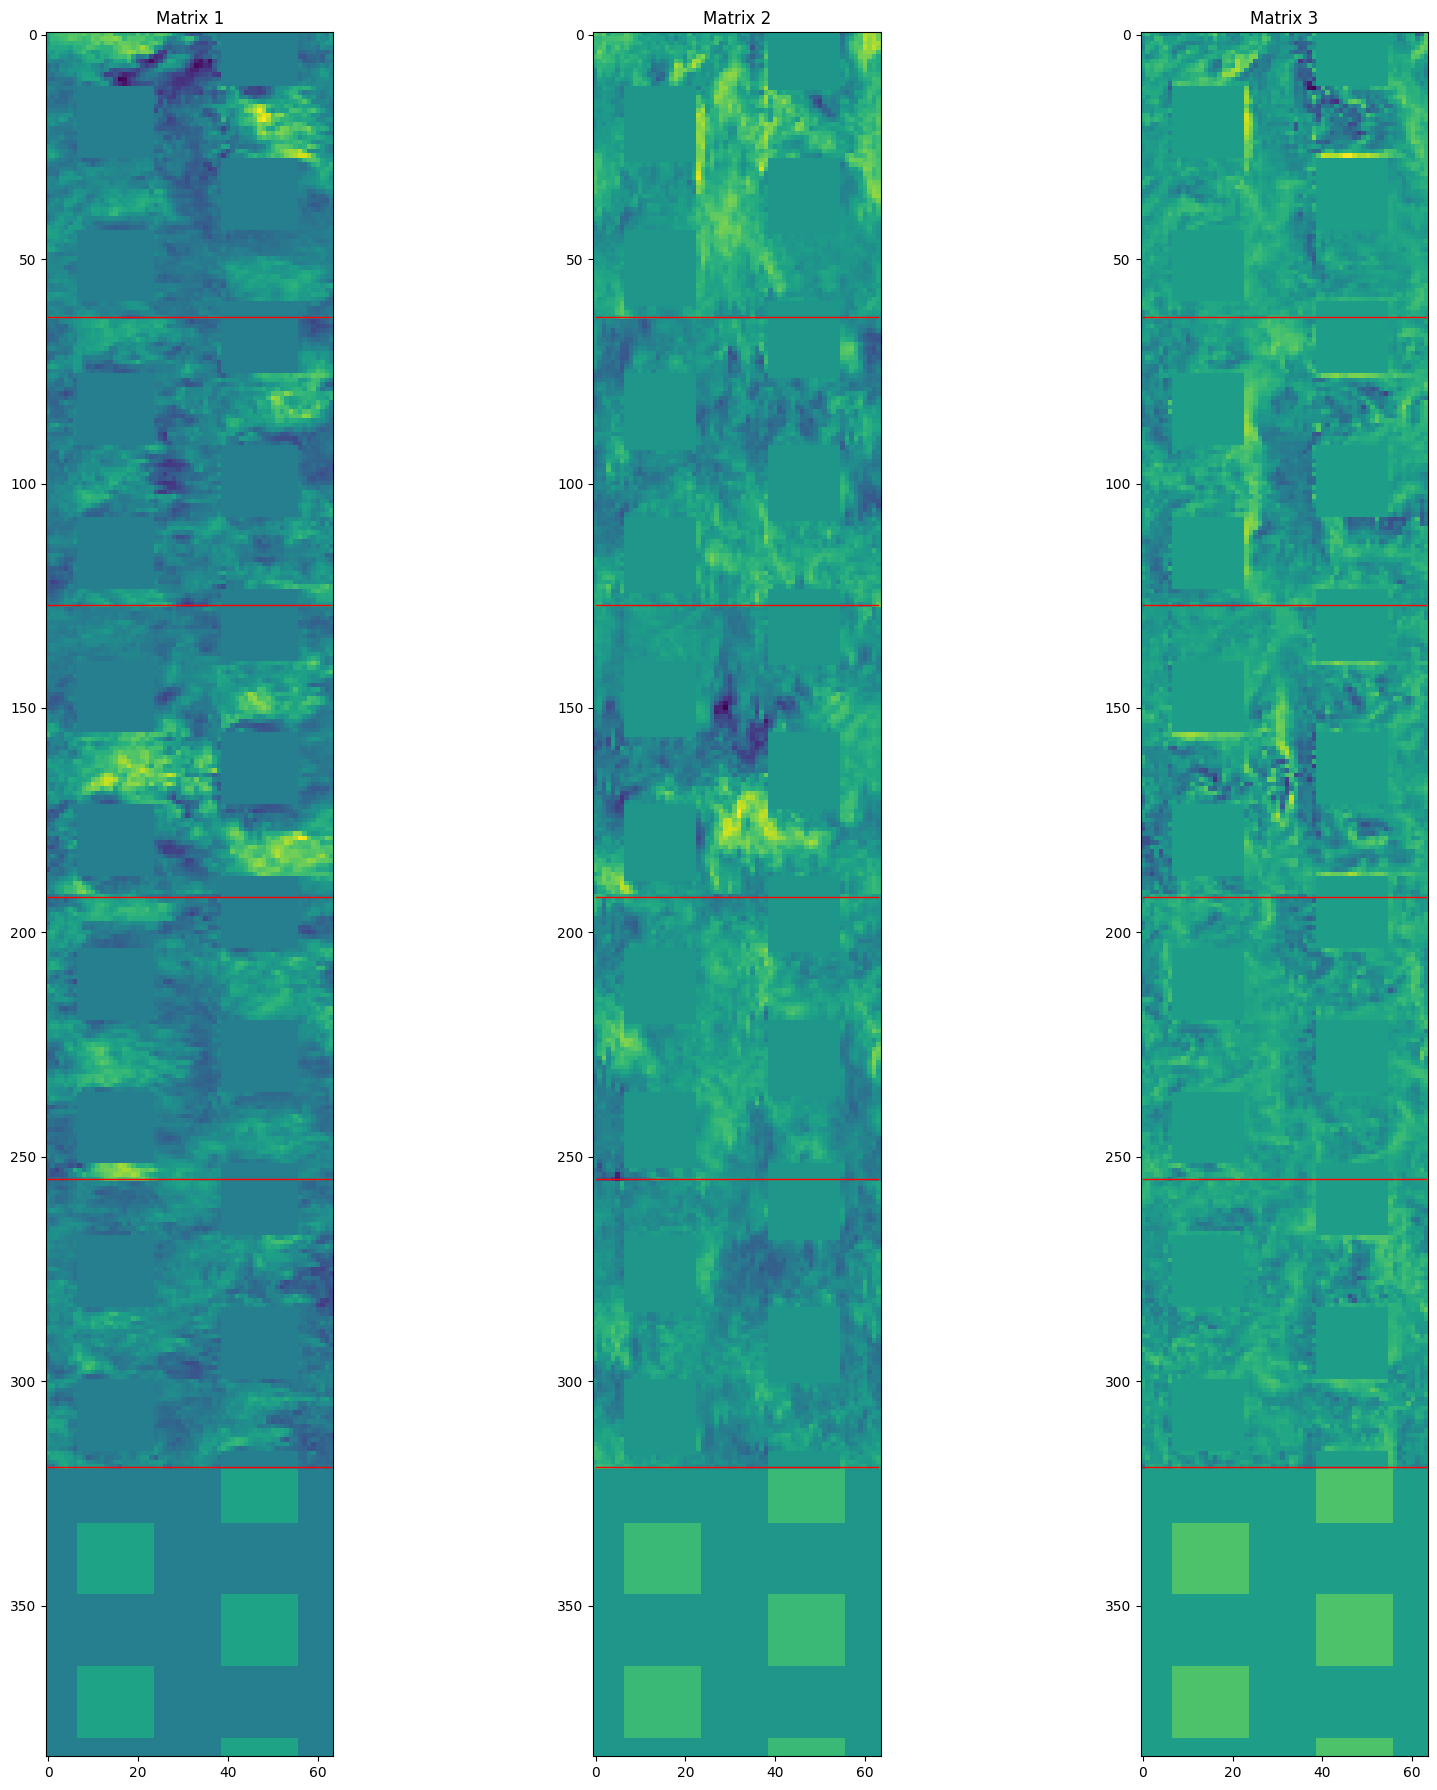

In [27]:
# Testing for plus-shape sub domain funciton output before standardization
path_1 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_0.npy'
path_2 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_1.npy'
path_3 = r'H:\DDGAN\building_location.npy'

matrix_list = block_picking_plus_test(path_1,path_2,path_3)
print("\nAccessing stored matrices:")
for idx, mat in enumerate(matrix_list):
    print(f"Matrix {idx + 1} size: {mat.shape}")

lines = {
    'horizontal_1': ([63, 63], [0, 63]),
    'horizontal_2': ([127, 127], [0, 63]),
    'horizontal_3': ([192, 192], [0, 63]),
    'horizontal_4': ([255, 255], [0, 63]),
    'horizontal_5': ([319, 319], [0, 63])
}

num_matrices = len(matrix_list)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
        for line in lines.values():
            ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

75 70

Accessing stored matrices:
Matrix 1 size: (576, 64)
Matrix 2 size: (576, 64)
Matrix 3 size: (576, 64)


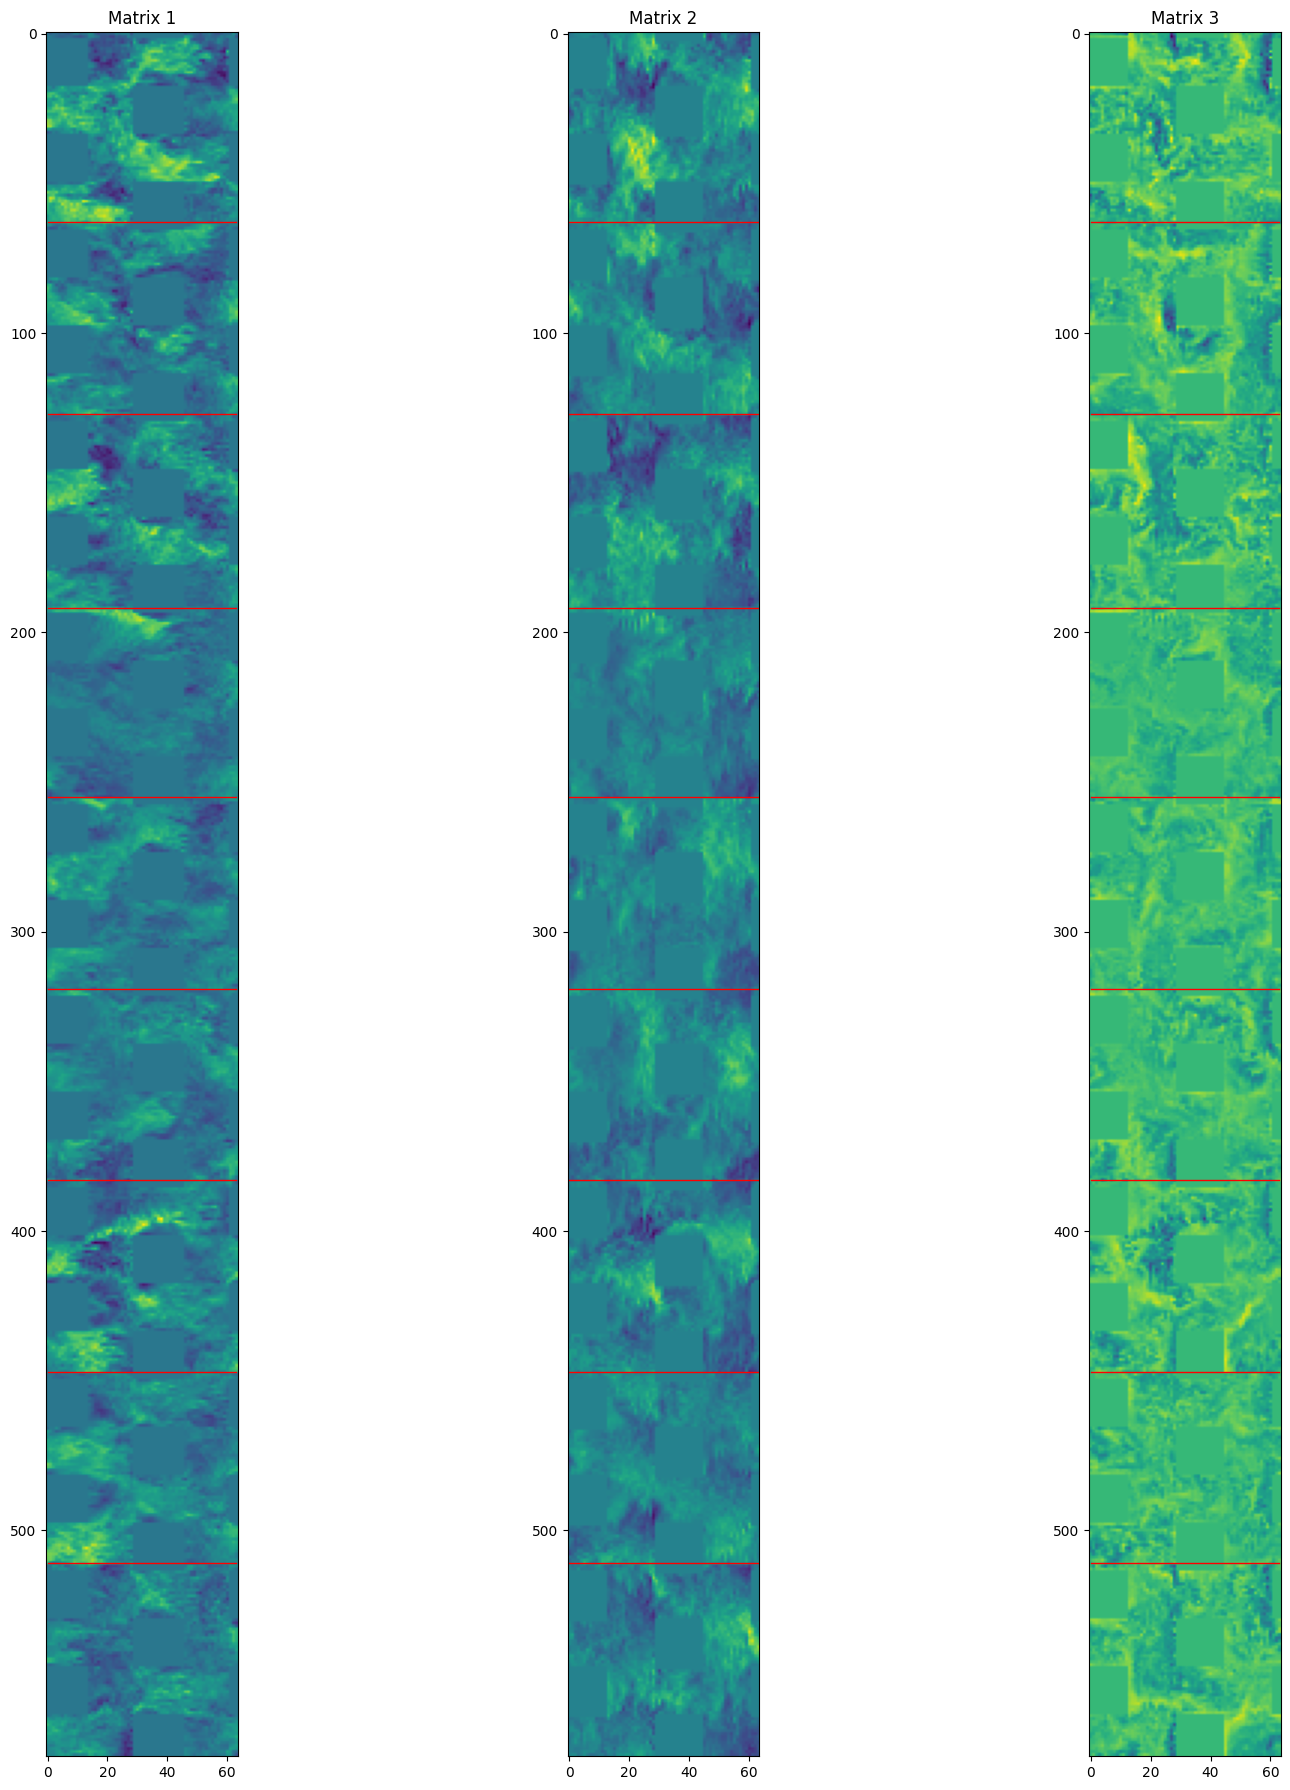

In [7]:
# nine-grid testing section ()

import numpy as np

path_1 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_0.npy'

matrix_list = block_picking_nine_test(path_1)
print("\nAccessing stored matrices:")
for idx, mat in enumerate(matrix_list):
    print(f"Matrix {idx + 1} size: {mat.shape}")

lines = {
    'horizontal_1': ([63, 63], [0, 63]),
    'horizontal_2': ([127, 127], [0, 63]),
    'horizontal_3': ([192, 192], [0, 63]),
    'horizontal_4': ([255, 255], [0, 63]),
    'horizontal_5': ([319, 319], [0, 63]),
    'horizontal_6': ([383, 383], [0, 63]),
    'horizontal_7': ([447, 447], [0, 63]),
    'horizontal_8': ([511, 511], [0, 63])
}

num_matrices = len(matrix_list)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
        for line in lines.values():
            ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

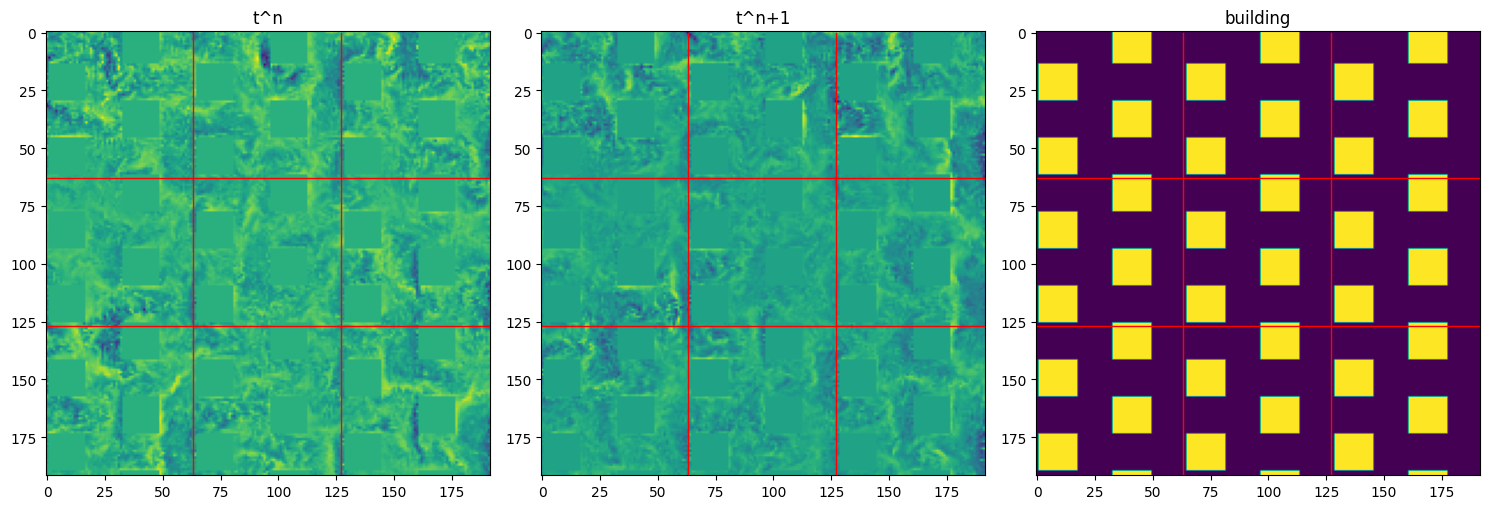

In [42]:
# Testing for funciton output before standardization
path_1 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_0.npy' 
path_2 = r'H:\DDGAN\Orig_dataset\npy_uvw\uvw_1.npy' 
path_3 = r'H:\DDGAN\building_location.npy' 
t_1 = np.load(path_1)
t_2 = np.load(path_2)
t_3 = np.load(path_3)
matrix_a = t_1[2]
matrix_b = t_2[2]
matrix_c = t_3
x = 71
y = 90
height, width = matrix_a.shape
x_min = x - 64
x_max = x + 64*2
y_min = y - 64
y_max = y + 128
testing_domain_0 = matrix_a[y_min:y_max, x_min:x_max]
testing_domain_1 = matrix_b[y_min:y_max, x_min:x_max]
testing_domain_2 = matrix_c[y_min:y_max, x_min:x_max]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

lines = {
    'horizontal_mid1': ([63, 63], [0, 191]),
    'horizontal_mid2': ([127, 127], [0, 191]),
    'vertical_mid1': ([0, 191], [63, 63]),
    'vertical_mid2': ([0, 191], [127, 127])
}
matrices = [testing_domain_0, testing_domain_1, testing_domain_2]
titles = ['t^n', 't^n+1', 'building']

# Plot each matrix with lines
for ax, matrix, title in zip(axes, matrices, titles):
    im = ax.imshow(matrix, cmap='viridis')
    ax.set_title(title)
    
    # Draw lines on the matrix
    for line in lines.values():
        ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

In [13]:
# plus-shape sub domain with building height 1000*5 samples

import os
import numpy as np
import matplotlib.pyplot as plt
import glob

def extract_time_step(filename):
    """ 
    Extract the numeric part from the filename 'uvw_X.npy'
    """
    base = os.path.basename(filename)
    number_part = base.split('_')[1].split('.')[0] 
    return int(number_part)

def block_picking_plus(path_1, path_2, path_3):
    """
    加号法 (plus-shape method)
    grid_1 at t^N
    grid_2 at t^(N+1)
    grid_3 is building info matrix
    (x,y) is picked randomly to extract a block
    """
    t_1 = np.load(path_1)
    t_2 = np.load(path_2)
    grid_3 = np.load(path_3)

    width, height = grid_3.shape
    min = 64                                # Minimum offset
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    h_block = grid_3[y:y+64, x:x+64]
    matrix_list = []
    C_block_next_level_list = []

    for i, grid_1 in enumerate(t_1[:3], start=1 ):
        grid_2 = t_2[i-1]
        S_block = grid_2[y+64:y+128, x:x+64]        
        E_block = grid_2[y:y+64, x+64:x+128]
        W_block = grid_2[y:y+64, x-64:x]
        N_block = grid_2[y-64:y, x:x+64]
        C_block = grid_1[y:y+64, x:x+64]

        C_block_next_level = grid_2[y:y+64, x:x+64]

        stack_matrix = np.vstack([N_block, E_block, W_block, S_block, C_block])
        matrix_list.append(stack_matrix)
        C_block_next_level_list.append(C_block_next_level)

    print(x,y)

    return matrix_list, C_block_next_level_list, h_block

buidling = r'H:\DDGAN\building_height.npy'
directory = r"H:\DDGAN\Orig_dataset\npy_uvw"
files = sorted(glob.glob(os.path.join(directory, 'uvw_*.npy')), key=extract_time_step)

output_directory_1 = r'H:\DDGAN\plus_height\samples_g'
output_directory_2 = r'H:\DDGAN\plus_height\samples_d'
output_directory_3 = r'H:\DDGAN\plus_height\samples_h'
os.makedirs(output_directory_1, exist_ok=True)
os.makedirs(output_directory_2, exist_ok=True)
os.makedirs(output_directory_3, exist_ok=True)

timestep = 0

for i in range(min(1000, len(files) - 1)):

    path_1 = files[i]
    path_2 = files[i + 1]
    print(f"Processing pair: {os.path.basename(path_1)} and {os.path.basename(path_2)}")

    for j in range(5):
        print(f"timestep = ",timestep)
        stacked_matrix_list, center_matrix_list, h_block = block_picking_plus(path_1, path_2, buidling)

        u_matrix_input = stacked_matrix_list[0]
        v_matrix_input = stacked_matrix_list[1]
        w_matrix_input = stacked_matrix_list[2]

        u_c_matrix = center_matrix_list[0]
        v_c_matrix = center_matrix_list[1]
        w_c_matrix = center_matrix_list[2]

        h_block = h_block

        print(f"u_matrix size",{u_matrix_input.shape})
        print(f"u_c_matrix size",{u_c_matrix.shape})

        np.save(os.path.join(output_directory_1, f"g_sample_{timestep}.npy"), [u_matrix_input, v_matrix_input, w_matrix_input])
        np.save(os.path.join(output_directory_2, f"d_sample_{timestep}.npy"), [u_c_matrix, v_c_matrix, w_c_matrix])
        np.save(os.path.join(output_directory_3, f"h_sample_{timestep}.npy"), [h_block])


        timestep += 1

Processing pair: uvw_0.npy and uvw_1.npy
timestep =  0
66 81
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  1
117 75
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  2
102 82
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  3
92 115
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  4
104 75
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
Processing pair: uvw_1.npy and uvw_2.npy
timestep =  5
116 112
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  6
80 105
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  7
95 128
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  8
66 102
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  9
107 112
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
Processing pair: uvw_2.npy and uvw_3.npy
timestep =  10
123 85
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  11
111 116
u_matrix size {(320, 64)}
u_c_matrix s


Accessing stored input velocity matrices:
Matrix 1 size: (320, 64)
Matrix 2 size: (320, 64)
Matrix 3 size: (320, 64)


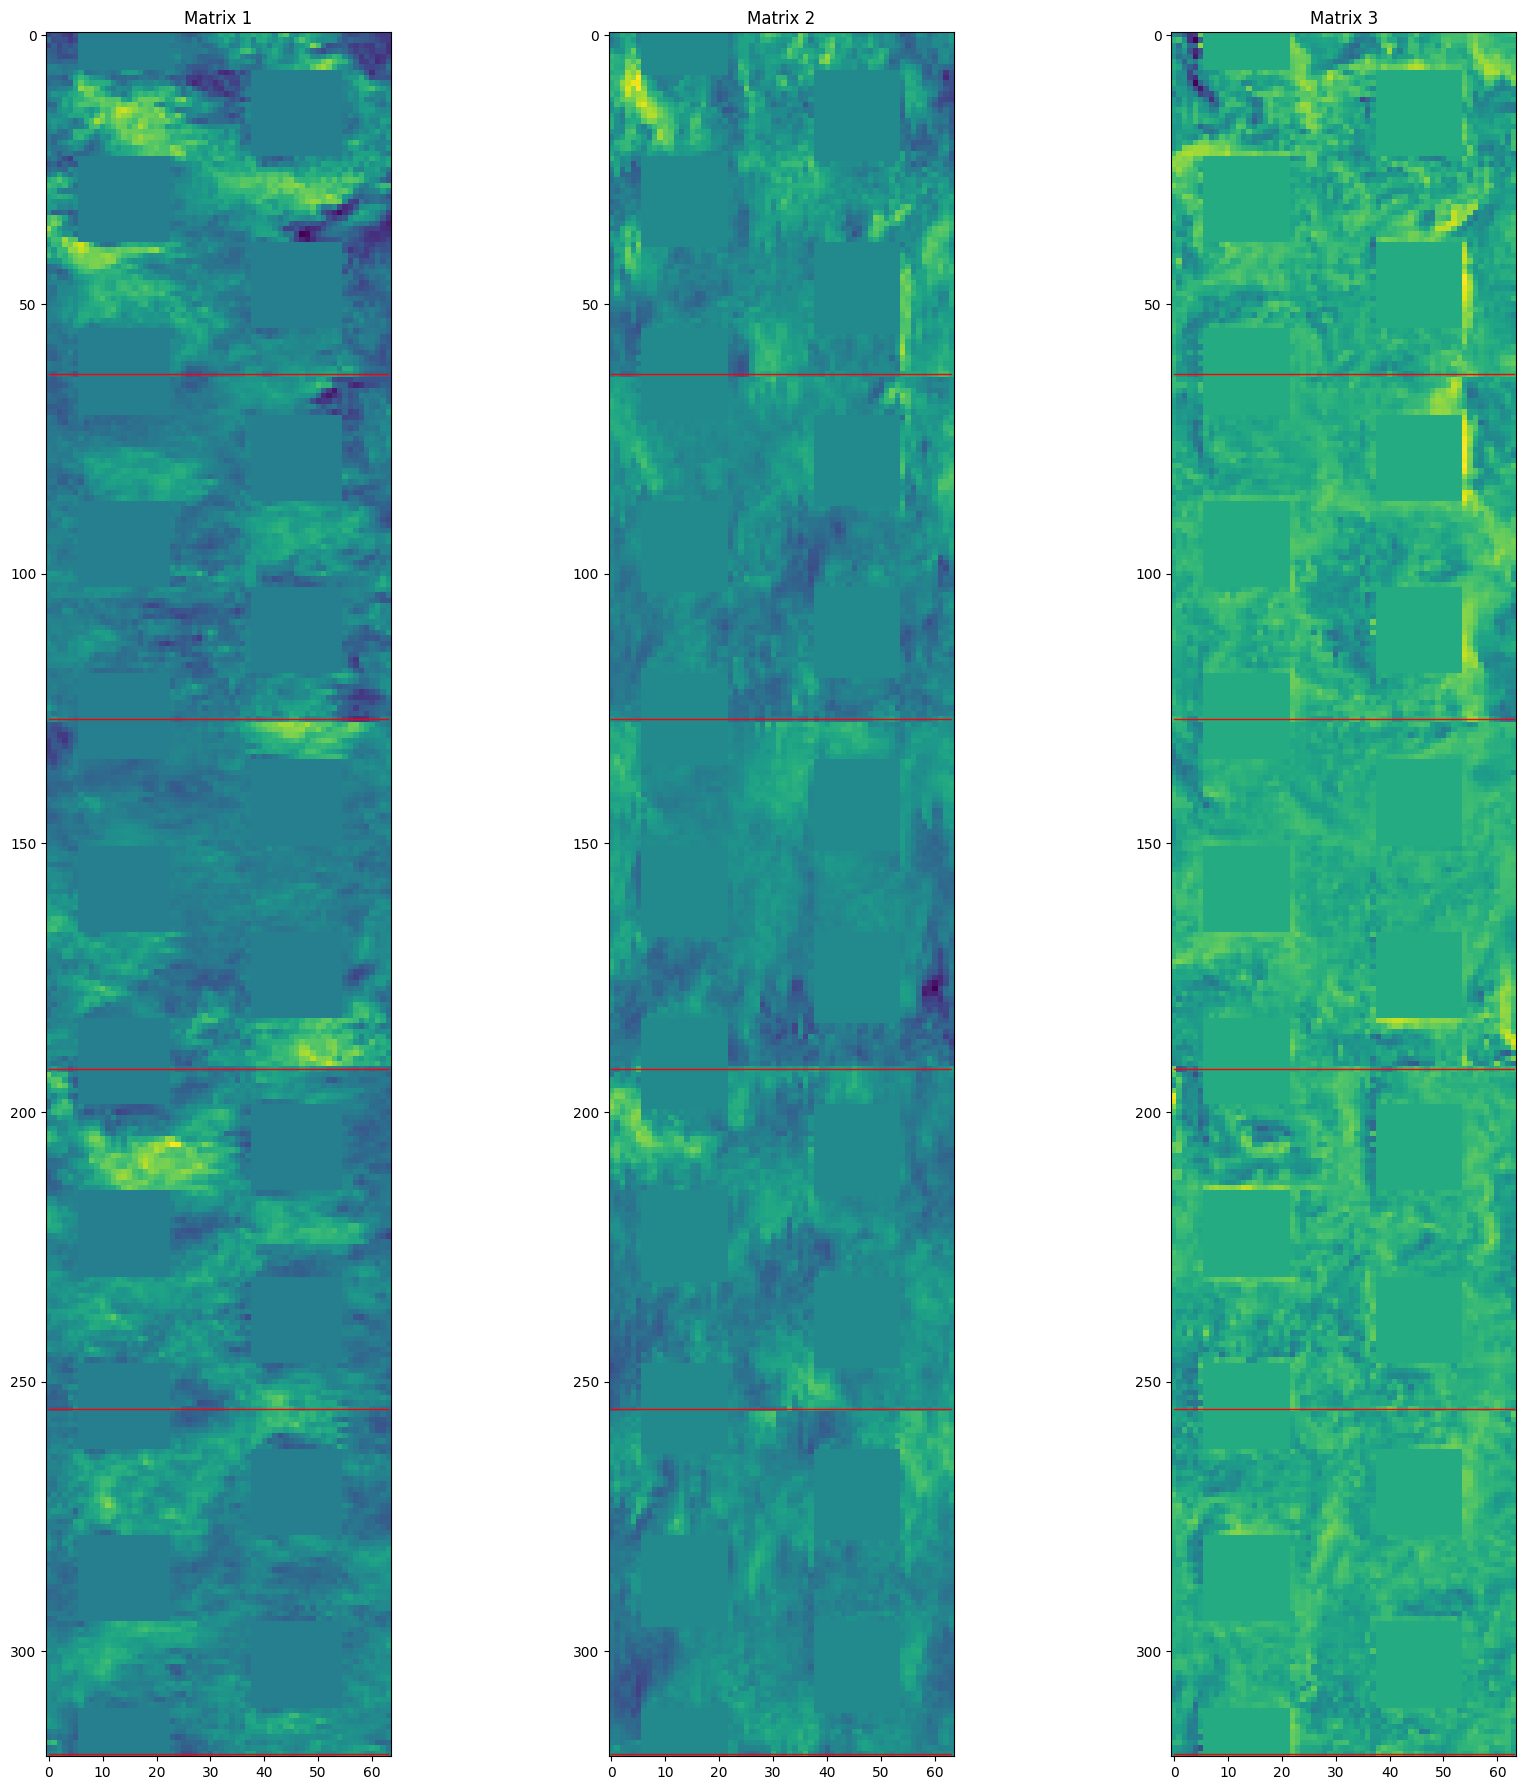

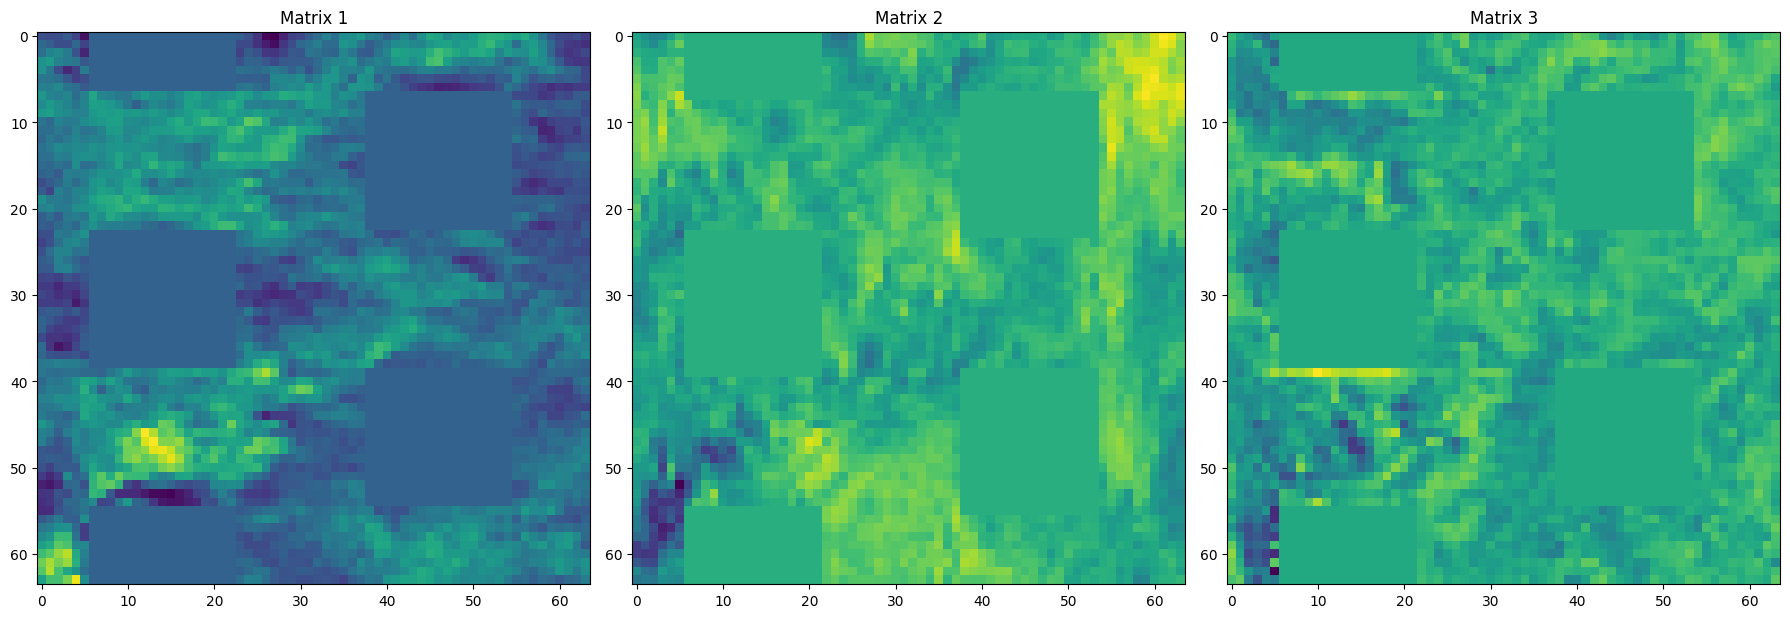

(1, 64, 64)


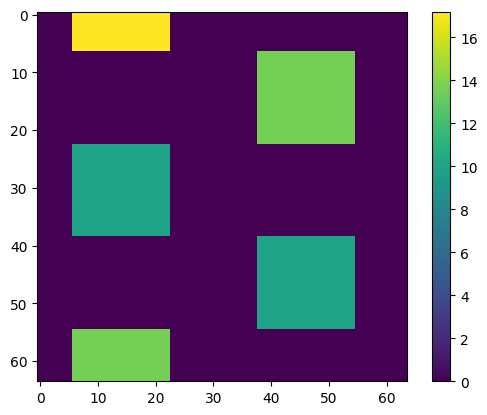

In [30]:
# output testing for plus-shape sub domain with building height 1000*5 samples
# 66 81
path_1 = r'H:\DDGAN\plus_height\samples_g\g_sample_0.npy'
path_2 = r'H:\DDGAN\plus_height\samples_d\d_sample_0.npy'
building = r'H:\DDGAN\plus_height\samples_h\h_sample_0.npy'
matrix = np.load(path_1)
matrix2 = np.load(path_2)
building_1 = np.load(buidling)
u = matrix[0]
v = matrix[1]
w = matrix[2]

u1 = matrix2[0]
v1 = matrix2[1]
w1 = matrix2[2]

b1 = building_1[0]

matrix_list = [u,v,w]
matrix_list_2 = [u1,v1,w1]
matrix_list_3 = [b1]

print("\nAccessing stored input velocity matrices:")
for idx, mat in enumerate(matrix_list):
    print(f"Matrix {idx + 1} size: {mat.shape}")

lines = {
    'horizontal_1': ([63, 63], [0, 63]),
    'horizontal_2': ([127, 127], [0, 63]),
    'horizontal_3': ([192, 192], [0, 63]),
    'horizontal_4': ([255, 255], [0, 63]),
    'horizontal_5': ([319, 319], [0, 63])
}

num_matrices = len(matrix_list)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
        for line in lines.values():
            ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

num_matrices = len(matrix_list_2)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list_2):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()
plt.show()

building = r'H:\DDGAN\plus_height\samples_h\h_sample_0.npy'
matrix = np.load(building)
print(matrix.shape)
import numpy as np
import matplotlib.pyplot as plt
matrix = matrix[0]
fig, ax = plt.subplots()
cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
plt.colorbar(cax)
plt.show()

In [31]:
# plus-shape sub domain with building mask 1000*5 samples

import os
import numpy as np
import matplotlib.pyplot as plt
import glob

def extract_time_step(filename):
    """ 
    Extract the numeric part from the filename 'uvw_X.npy'
    """
    base = os.path.basename(filename)
    number_part = base.split('_')[1].split('.')[0] 
    return int(number_part)

def block_picking_plus(path_1, path_2, path_3):
    """
    加号法 (plus-shape method)
    grid_1 at t^N
    grid_2 at t^(N+1)
    grid_3 is building info matrix
    (x,y) is picked randomly to extract a block
    """
    t_1 = np.load(path_1)
    t_2 = np.load(path_2)
    grid_3 = np.load(path_3)

    width, height = grid_3.shape
    min = 64                                # Minimum offset
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    h_block = grid_3[y:y+64, x:x+64]
    matrix_list = []
    C_block_next_level_list = []

    for i, grid_1 in enumerate(t_1[:3], start=1 ):
        grid_2 = t_2[i-1]
        S_block = grid_2[y+64:y+128, x:x+64]        
        E_block = grid_2[y:y+64, x+64:x+128]
        W_block = grid_2[y:y+64, x-64:x]
        N_block = grid_2[y-64:y, x:x+64]
        C_block = grid_1[y:y+64, x:x+64]

        C_block_next_level = grid_2[y:y+64, x:x+64]

        stack_matrix = np.vstack([N_block, E_block, W_block, S_block, C_block])
        matrix_list.append(stack_matrix)
        C_block_next_level_list.append(C_block_next_level)

    print(x,y)

    return matrix_list, C_block_next_level_list, h_block

buidling = r'H:\DDGAN\building_location.npy'
directory = r"H:\DDGAN\Orig_dataset\npy_uvw"
files = sorted(glob.glob(os.path.join(directory, 'uvw_*.npy')), key=extract_time_step)

output_directory_1 = r'H:\DDGAN\plus_mask\samples_g'
output_directory_2 = r'H:\DDGAN\plus_mask\samples_d'
output_directory_3 = r'H:\DDGAN\plus_mask\samples_h'
os.makedirs(output_directory_1, exist_ok=True)
os.makedirs(output_directory_2, exist_ok=True)
os.makedirs(output_directory_3, exist_ok=True)

timestep = 0

for i in range(min(1000, len(files) - 1)):

    path_1 = files[i]
    path_2 = files[i + 1]
    print(f"Processing pair: {os.path.basename(path_1)} and {os.path.basename(path_2)}")

    for j in range(5):
        print(f"timestep = ",timestep)
        stacked_matrix_list, center_matrix_list, h_block = block_picking_plus(path_1, path_2, buidling)

        u_matrix_input = stacked_matrix_list[0]
        v_matrix_input = stacked_matrix_list[1]
        w_matrix_input = stacked_matrix_list[2]

        u_c_matrix = center_matrix_list[0]
        v_c_matrix = center_matrix_list[1]
        w_c_matrix = center_matrix_list[2]

        h_block = h_block

        print(f"u_matrix size",{u_matrix_input.shape})
        print(f"u_c_matrix size",{u_c_matrix.shape})

        np.save(os.path.join(output_directory_1, f"g_sample_{timestep}.npy"), [u_matrix_input, v_matrix_input, w_matrix_input])
        np.save(os.path.join(output_directory_2, f"d_sample_{timestep}.npy"), [u_c_matrix, v_c_matrix, w_c_matrix])
        np.save(os.path.join(output_directory_3, f"h_sample_{timestep}.npy"), [h_block])


        timestep += 1

Processing pair: uvw_0.npy and uvw_1.npy
timestep =  0
113 122
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  1
124 97
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  2
92 98
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  3
118 128
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  4
75 90
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
Processing pair: uvw_1.npy and uvw_2.npy
timestep =  5
77 116
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  6
128 98
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  7
101 85
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  8
104 86
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  9
74 96
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
Processing pair: uvw_2.npy and uvw_3.npy
timestep =  10
126 113
u_matrix size {(320, 64)}
u_c_matrix size {(64, 64)}
timestep =  11
90 76
u_matrix size {(320, 64)}
u_c_matrix size


Accessing stored input velocity matrices:
Matrix 1 size: (320, 64)
Matrix 2 size: (320, 64)
Matrix 3 size: (320, 64)


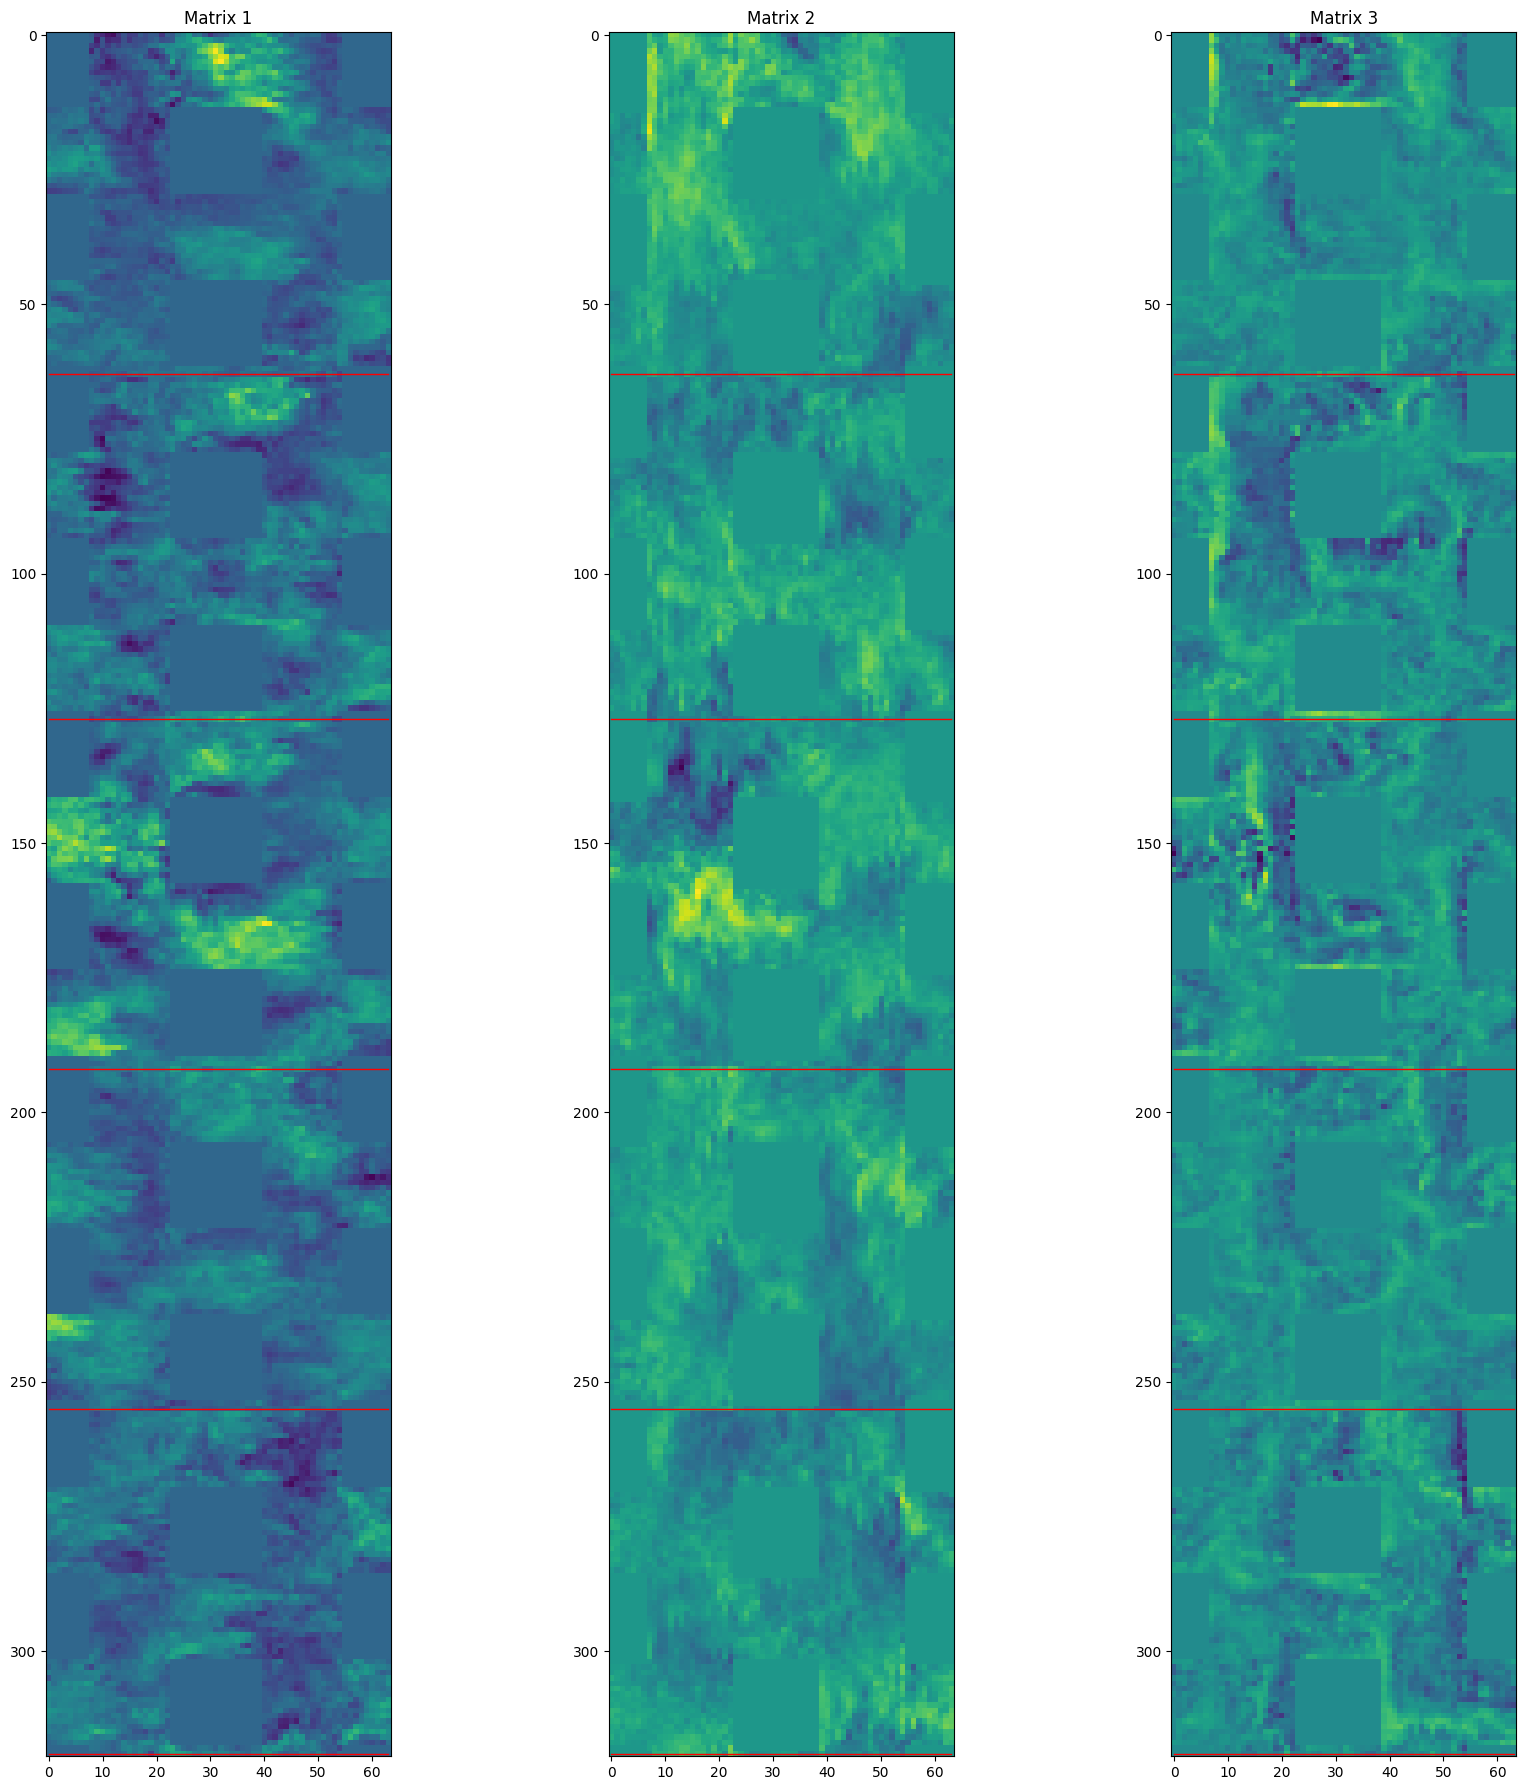

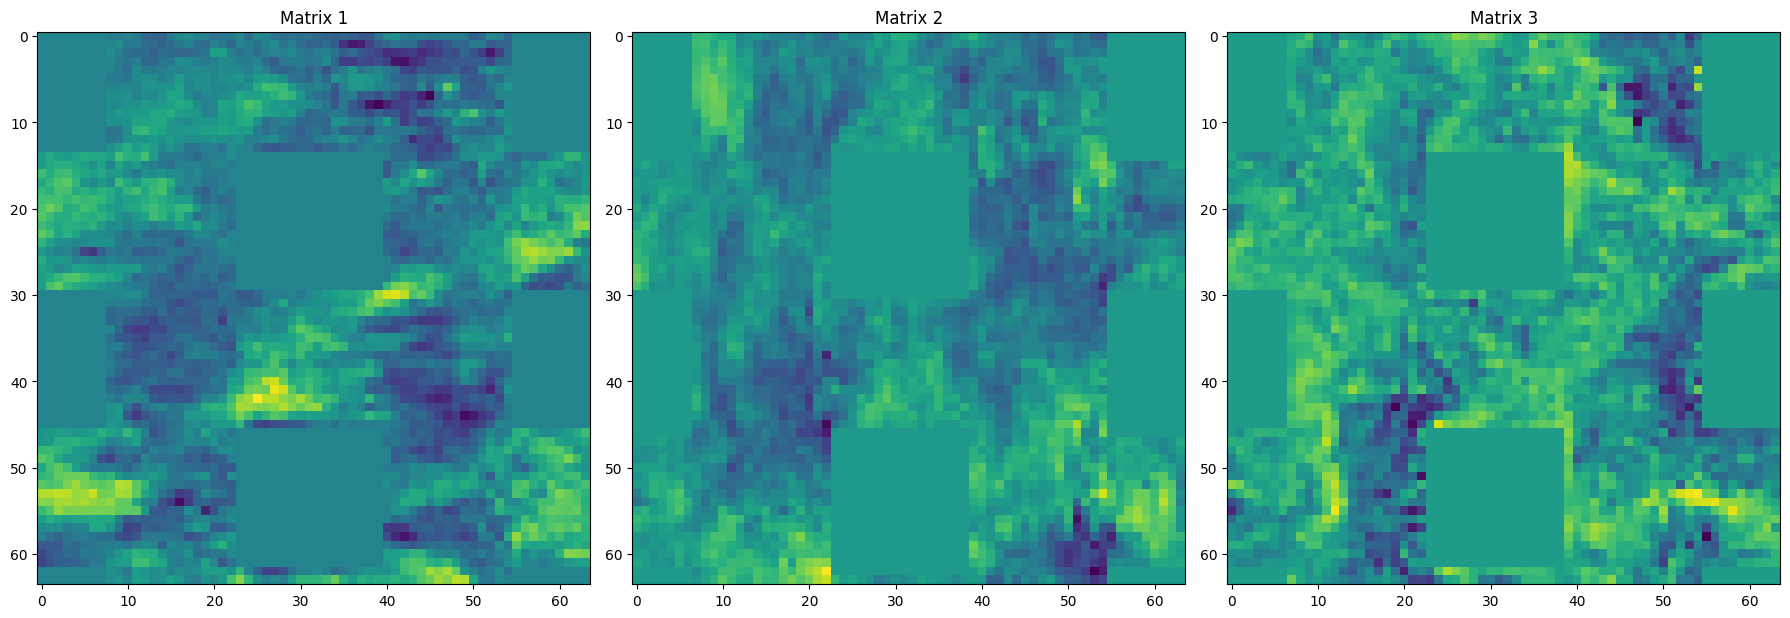

(1, 64, 64)


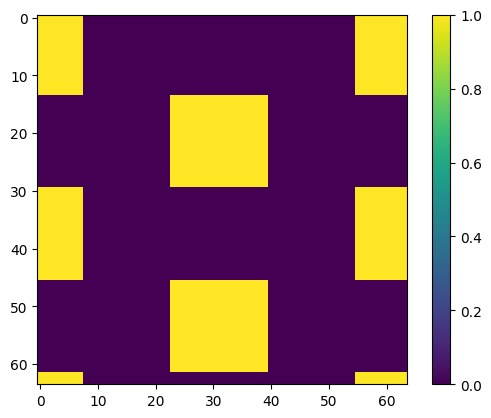

In [35]:
# output testing plus-shape sub domain with building mask 1000*5 samples
# 113 122

path_1 = r'H:\DDGAN\plus_mask\samples_g\g_sample_0.npy'
path_2 = r'H:\DDGAN\plus_mask\samples_d\d_sample_0.npy'
matrix = np.load(path_1)
matrix2 = np.load(path_2)

u = matrix[0]
v = matrix[1]
w = matrix[2]

u1 = matrix2[0]
v1 = matrix2[1]
w1 = matrix2[2]

matrix_list = [u,v,w]
matrix_list_2 = [u1,v1,w1]


print("\nAccessing stored input velocity matrices:")
for idx, mat in enumerate(matrix_list):
    print(f"Matrix {idx + 1} size: {mat.shape}")

lines = {
    'horizontal_1': ([63, 63], [0, 63]),
    'horizontal_2': ([127, 127], [0, 63]),
    'horizontal_3': ([192, 192], [0, 63]),
    'horizontal_4': ([255, 255], [0, 63]),
    'horizontal_5': ([319, 319], [0, 63])
}

num_matrices = len(matrix_list)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
        for line in lines.values():
            ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

num_matrices = len(matrix_list_2)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list_2):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()
plt.show()

building = r'H:\DDGAN\plus_mask\samples_h\h_sample_0.npy'
matrix = np.load(building)
print(matrix.shape)
import numpy as np
import matplotlib.pyplot as plt
matrix = matrix[0]
fig, ax = plt.subplots()
cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
plt.colorbar(cax)
plt.show()

In [2]:
# nine-grid sub domain no building matrix 1000*5 samples
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
def extract_time_step(filename):
    """ 
    Extract the numeric part from the filename 'uvw_X.npy'
    """
    base = os.path.basename(filename)
    number_part = base.split('_')[1].split('.')[0] 
    return int(number_part)

# testing function (nine-grid sub-domain)

def block_picking_nine(path_1,path_2):
    """
    九宫格方法 (nine_grid method)
    """
    t_1 = np.load(path_1)
    t_2 = np.load(path_2)
    
    grid_3 = t_1[0]

    width, height = grid_3.shape
    min = 64 
    max_x = width - 128
    max_y = height - 128
    x = np.random.randint(min, max_x + 1)
    y = np.random.randint(min, max_y + 1)

    matrix_list = []
    true_matrix_list = []

    for i, grid_1 in enumerate(t_1[:3], start=1):
        grid_2 = t_2[i-1]
        # Ensuring positive slices
        block_1_1 = grid_1[y-64:y, x-64:x]
        block_1_2 = grid_1[y-64:y, x:x+64]
        block_1_3 = grid_1[y-64:y, x+64:x+128]  
 
        block_2_1 = grid_1[y:y+64, x-64:x]
        block_2_2 = grid_1[y:y+64, x:x+64]
        block_2_3 = grid_1[y:y+64, x+64:x+128]
        
        block_3_1 = grid_1[y+64:y+128, x-64:x]
        block_3_2 = grid_1[y+64:y+128, x:x+64]
        block_3_3 = grid_1[y+64:y+128, x+64:x+128]

        block_t_n_plus = grid_2[y:y+64, x:x+64]

        stack_matrix = np.vstack([block_1_1, block_1_2, block_1_3, block_2_1, block_2_2, block_2_3, block_3_1, block_3_2, block_3_3])
        true_matrix_list.append(block_t_n_plus)
        matrix_list.append(stack_matrix)

    print(x,y)

    return matrix_list, true_matrix_list

directory = r"H:\DDGAN\Orig_dataset\npy_uvw"
files = sorted(glob.glob(os.path.join(directory, 'uvw_*.npy')), key=extract_time_step)

output_directory_1 = r'H:\DDGAN\nine_grid_unseen\samples_g'
output_directory_2 = r'H:\DDGAN\nine_grid_unseen\samples_d'
os.makedirs(output_directory_1, exist_ok=True)
os.makedirs(output_directory_2, exist_ok=True)

timestep = 0

for i in range(min(10, len(files) - 1)):

    path_1 = files[i]
    path_2 = files[i + 1]
    print(f"Processing pair: {os.path.basename(path_1)} and {os.path.basename(path_2)}")

    for j in range(5):
        print(f"timestep = ",timestep)
        stacked_matrix_list, center_matrix_list = block_picking_nine(path_1, path_2)

        u_matrix_input = stacked_matrix_list[0]
        v_matrix_input = stacked_matrix_list[1]
        w_matrix_input = stacked_matrix_list[2]

        u_c_matrix = center_matrix_list[0]
        v_c_matrix = center_matrix_list[1]
        w_c_matrix = center_matrix_list[2]

        print(f"u_matrix size",{u_matrix_input.shape})
        print(f"u_c_matrix size",{u_c_matrix.shape})

        np.save(os.path.join(output_directory_1, f"g_sample_{timestep}.npy"), [u_matrix_input, v_matrix_input, w_matrix_input])
        np.save(os.path.join(output_directory_2, f"d_sample_{timestep}.npy"), [u_c_matrix, v_c_matrix, w_c_matrix])

        timestep += 1

Processing pair: uvw_0.npy and uvw_1.npy
timestep =  0
64 111
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  1
119 128
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  2
124 95
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  3
95 75
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  4
80 123
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
Processing pair: uvw_1.npy and uvw_2.npy
timestep =  5
95 118
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  6
82 72
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  7
93 113
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  8
102 84
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  9
69 103
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
Processing pair: uvw_2.npy and uvw_3.npy
timestep =  10
92 84
u_matrix size {(576, 64)}
u_c_matrix size {(64, 64)}
timestep =  11
117 95
u_matrix size {(576, 64)}
u_c_matrix size 


Accessing stored input velocity matrices:
Matrix 1 size: (576, 64)
Matrix 2 size: (576, 64)
Matrix 3 size: (576, 64)


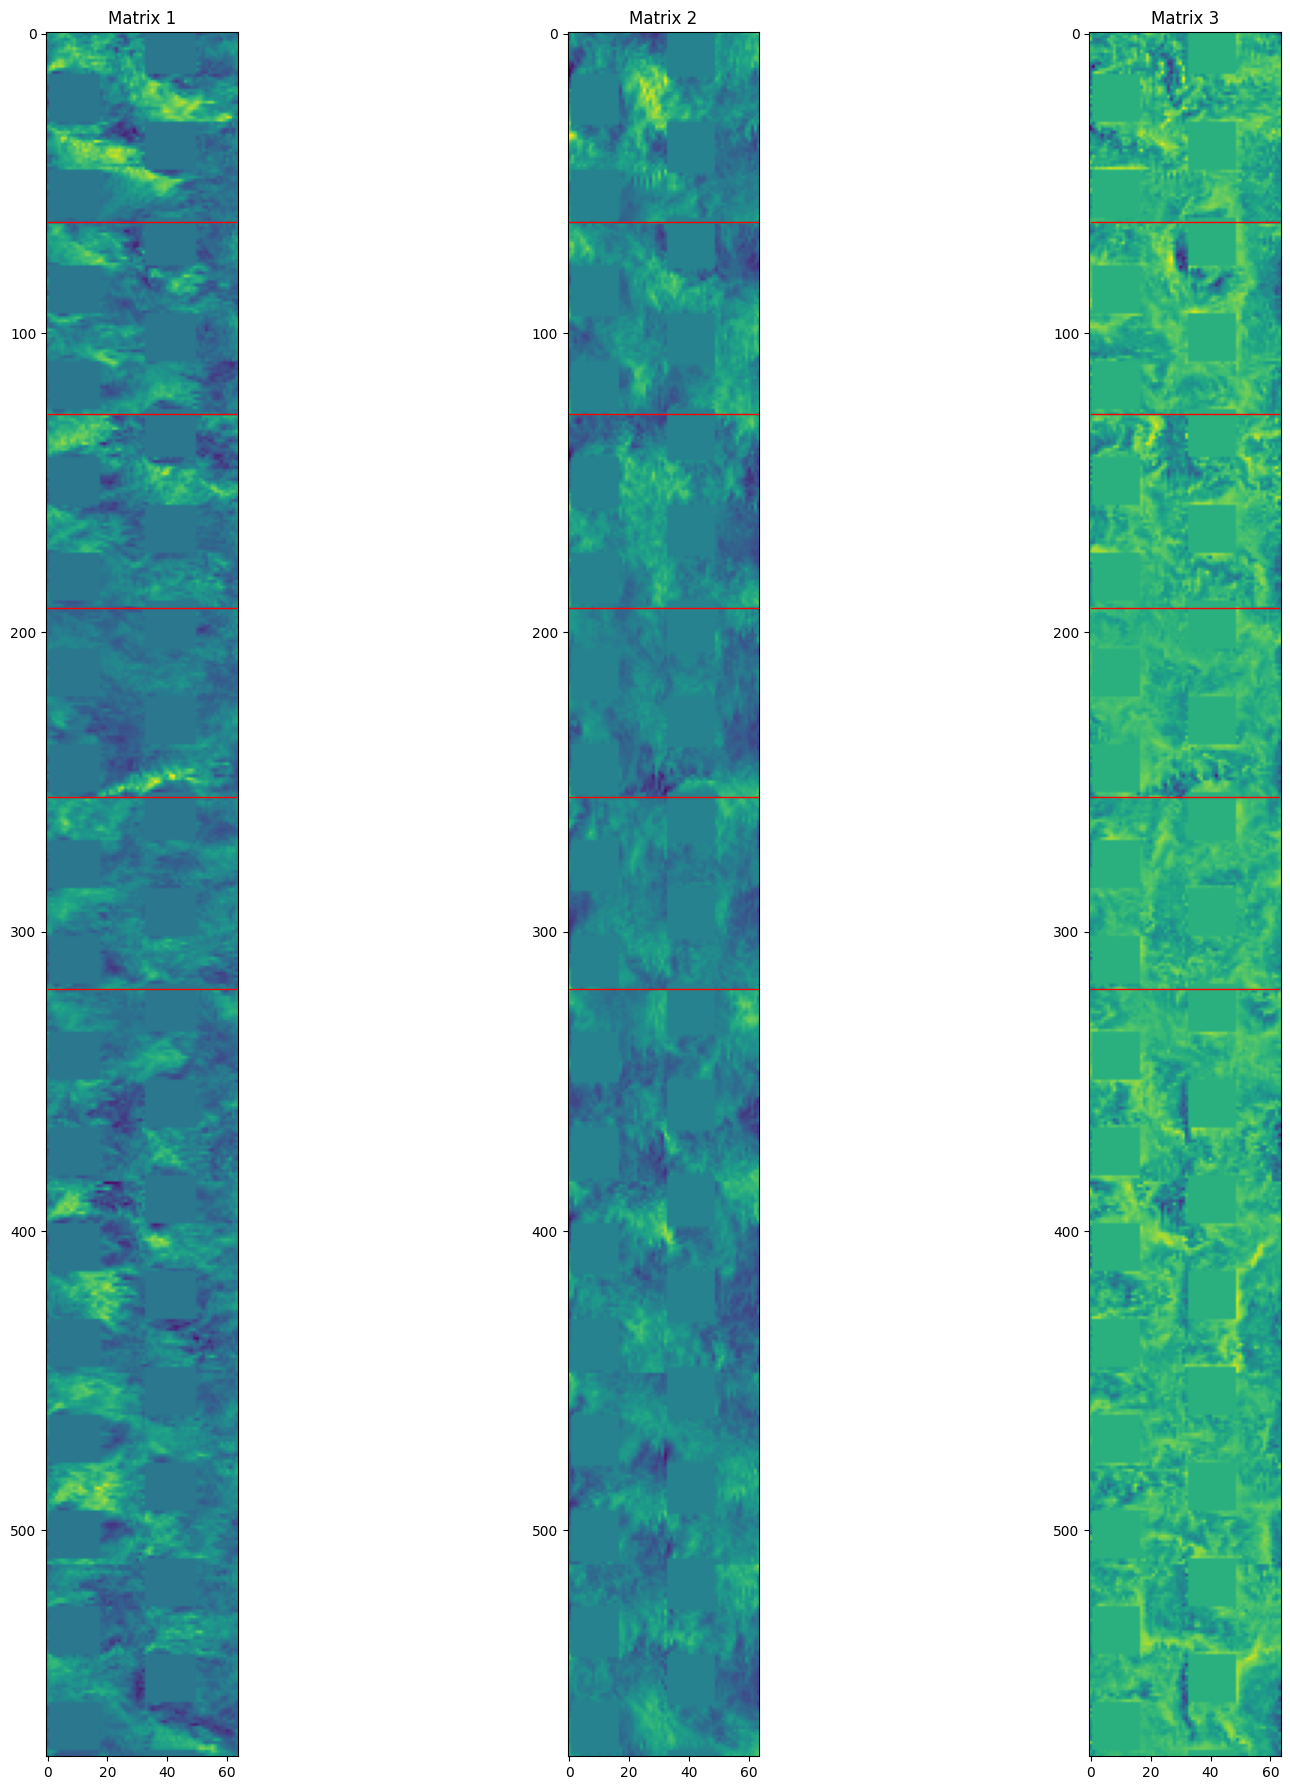

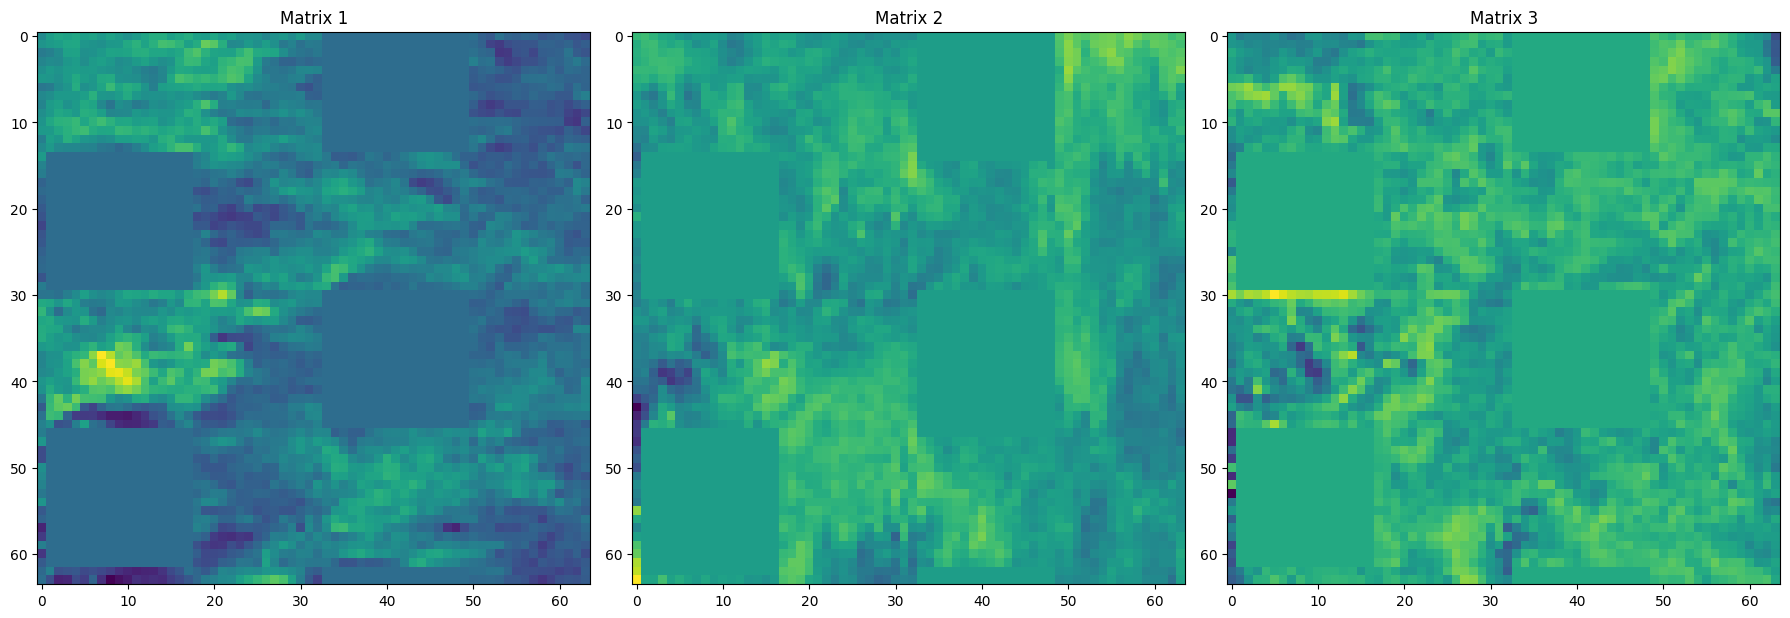

In [39]:
# output testing plus-shape sub domain with building mask 1000*5 samples
# 71 90

path_1 = r'H:\DDGAN\nine_grid\samples_g\g_sample_0.npy'
path_2 = r'H:\DDGAN\nine_grid\samples_d\d_sample_0.npy'
matrix = np.load(path_1)
matrix2 = np.load(path_2)

u = matrix[0]
v = matrix[1]
w = matrix[2]

u1 = matrix2[0]
v1 = matrix2[1]
w1 = matrix2[2]

matrix_list = [u,v,w]
matrix_list_2 = [u1,v1,w1]


print("\nAccessing stored input velocity matrices:")
for idx, mat in enumerate(matrix_list):
    print(f"Matrix {idx + 1} size: {mat.shape}")

lines = {
    'horizontal_1': ([63, 63], [0, 63]),
    'horizontal_2': ([127, 127], [0, 63]),
    'horizontal_3': ([192, 192], [0, 63]),
    'horizontal_4': ([255, 255], [0, 63]),
    'horizontal_5': ([319, 319], [0, 63])
}

num_matrices = len(matrix_list)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
        for line in lines.values():
            ax.plot(line[1], line[0], color='red', linewidth=1)
plt.tight_layout()
plt.show()

num_matrices = len(matrix_list_2)
fig, axes = plt.subplots(1, num_matrices, figsize=(18, 18))
for i, matrix in enumerate(matrix_list_2):
        if num_matrices == 1:
            ax = axes
        else:
            ax = axes[i]
        cax = ax.imshow(matrix, cmap='viridis', aspect='equal')
        ax.set_title(f'Matrix {i + 1}')
        ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()
plt.show()